In [2]:
#importing al needed librabries to be used for training

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from pathlib import Path
import os.path
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras
import tensorflow.keras.utils
from tensorflow.keras import utils as np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_files
import matplotlib.image as mpimg

print("hello world kwam") # used this print to display a text to confirm that all imports work correctly

hello world kwam


(100, 100, 3)


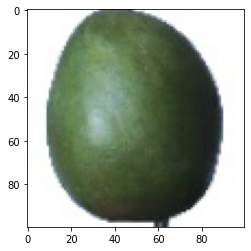

In [3]:
#printing the image of a data from the training dataset to confrim it is accessible
img = mpimg.imread('/Users/ayinlakwamdeen/Desktop/fruits-360/Training/mango/13_100.jpg')
print(img.shape)
plt.imshow(img)


(100, 100, 3)


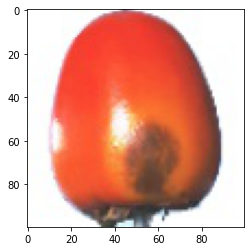

In [4]:
# Trying to access fruit image data from another folder to confirm it is also accessible.  
img = mpimg.imread('/Users/ayinlakwamdeen/Desktop/fruits-360/Training/Kaki/84_100.jpg')
print(img.shape)
plt.imshow(img)

In [5]:
# Testing to confrim the Total number of Training and Test data available and also number of possible classes.
# Create a list with the filepaths for training and testing
train_dir = Path('/Users/ayinlakwamdeen/Desktop/fruits-360/Training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/Users/ayinlakwamdeen/Desktop/fruits-360/Test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))


def proc_img(filepath):
    #Create a DataFrame with the filepath and the labels of the pictures

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)

print(f'Number of Fruits in train images: {train_df.shape[0]}\n')
print(f'Number of Fruits in Test images: {test_df.shape[0]}\n')
print(f'Number of All Fruits images: {train_df.shape[0]+train_df.shape[0]}\n')
print(f'Number of different Fruits labels: {len(train_df.Label.unique())}\n')
print(f'All Fruits Labels: {train_df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(131)

Number of Fruits in train images: 67692

Number of Fruits in Test images: 22688

Number of All Fruits images: 135384

Number of different Fruits labels: 131

All Fruits Labels: ['Pear 2' 'Physalis with Husk' 'Nectarine Flat' 'Tamarillo' 'Pepino'
 'Blueberry' 'Pepper Yellow' 'Tomato Cherry Red' 'Salak' 'Tomato 4'
 'Cocos' 'Tomato 3' 'Tomato not Ripened' 'Fig' 'Chestnut' 'Apple Red 3'
 'Apple Red Delicious' 'Peach Flat' 'Pear' 'Plum 2' 'Pepper Orange' 'Kiwi'
 'Cucumber Ripe 2' 'Nut Pecan' 'Tomato Maroon' 'Orange' 'Pineapple'
 'Grape White' 'Tangelo' 'Apple Granny Smith' 'Pear Williams' 'Lemon'
 'Huckleberry' 'Tomato Heart' 'Watermelon' 'Mandarine' 'Pitahaya Red'
 'Pear Kaiser' 'Kaki' 'Apple Braeburn' 'Banana Lady Finger' 'Papaya'
 'Cherry 2' 'Potato White' 'Apple Golden 1' 'Rambutan' 'Avocado ripe'
 'Onion White' 'Cherry Wax Yellow' 'Grapefruit Pink' 'Redcurrant' 'Plum 3'
 'Walnut' 'Peach' 'Beetroot' 'Apple Golden 2' 'Apple Red 1' 'Eggplant'
 'Kohlrabi' 'Pear Monster' 'Physalis' 'Tomato 

,Filepath,Label
0,/Users/ayinlakwamdeen/Desktop/fruits-360/Train...,Pear 2
1,/Users/ayinlakwamdeen/Desktop/fruits-360/Train...,Physalis with Husk
2,/Users/ayinlakwamdeen/Desktop/fruits-360/Train...,Nectarine Flat
3,/Users/ayinlakwamdeen/Desktop/fruits-360/Train...,Tamarillo
4,/Users/ayinlakwamdeen/Desktop/fruits-360/Train...,Pepino
...,...,...
126,/Users/ayinlakwamdeen/Desktop/fruits-360/Train...,Apple Red Yellow 2
127,/Users/ayinlakwamdeen/Desktop/fruits-360/Train...,Quince
128,/Users/ayinlakwamdeen/Desktop/fruits-360/Train...,Plum 2
129,/Users/ayinlakwamdeen/Desktop/fruits-360/Train...,Plum 3


In [6]:
#Loading the data into arrays and confirming the numbers are still intact
train_categories = [] #train categories/classes
train_samples = [] #train samples array 
for i in os.listdir('/Users/ayinlakwamdeen/Desktop/fruits-360/Test/'):
    train_categories.append(i)
    train_samples.append(len(os.listdir('/Users/ayinlakwamdeen/Desktop/fruits-360/Training/'+ i)))

test_categories = [] #test categories/classes
test_samples = [] #test samples array 
for i in os.listdir('/Users/ayinlakwamdeen/Desktop/fruits-360/Test/'):
    test_categories.append(i)
    test_samples.append(len(os.listdir('/Users/ayinlakwamdeen/Desktop/fruits-360/Test/'+ i)))


print("Total number of Fruits Classes", len(train_categories))
print("Total number of Fruits in Training set:", sum(train_samples))
print("Total number of Fruits in Set set:", sum(test_samples))

Total number of Fruits Classes 131
Total number of Fruits in Training set: 67692
Total number of Fruits in Set set: 22688


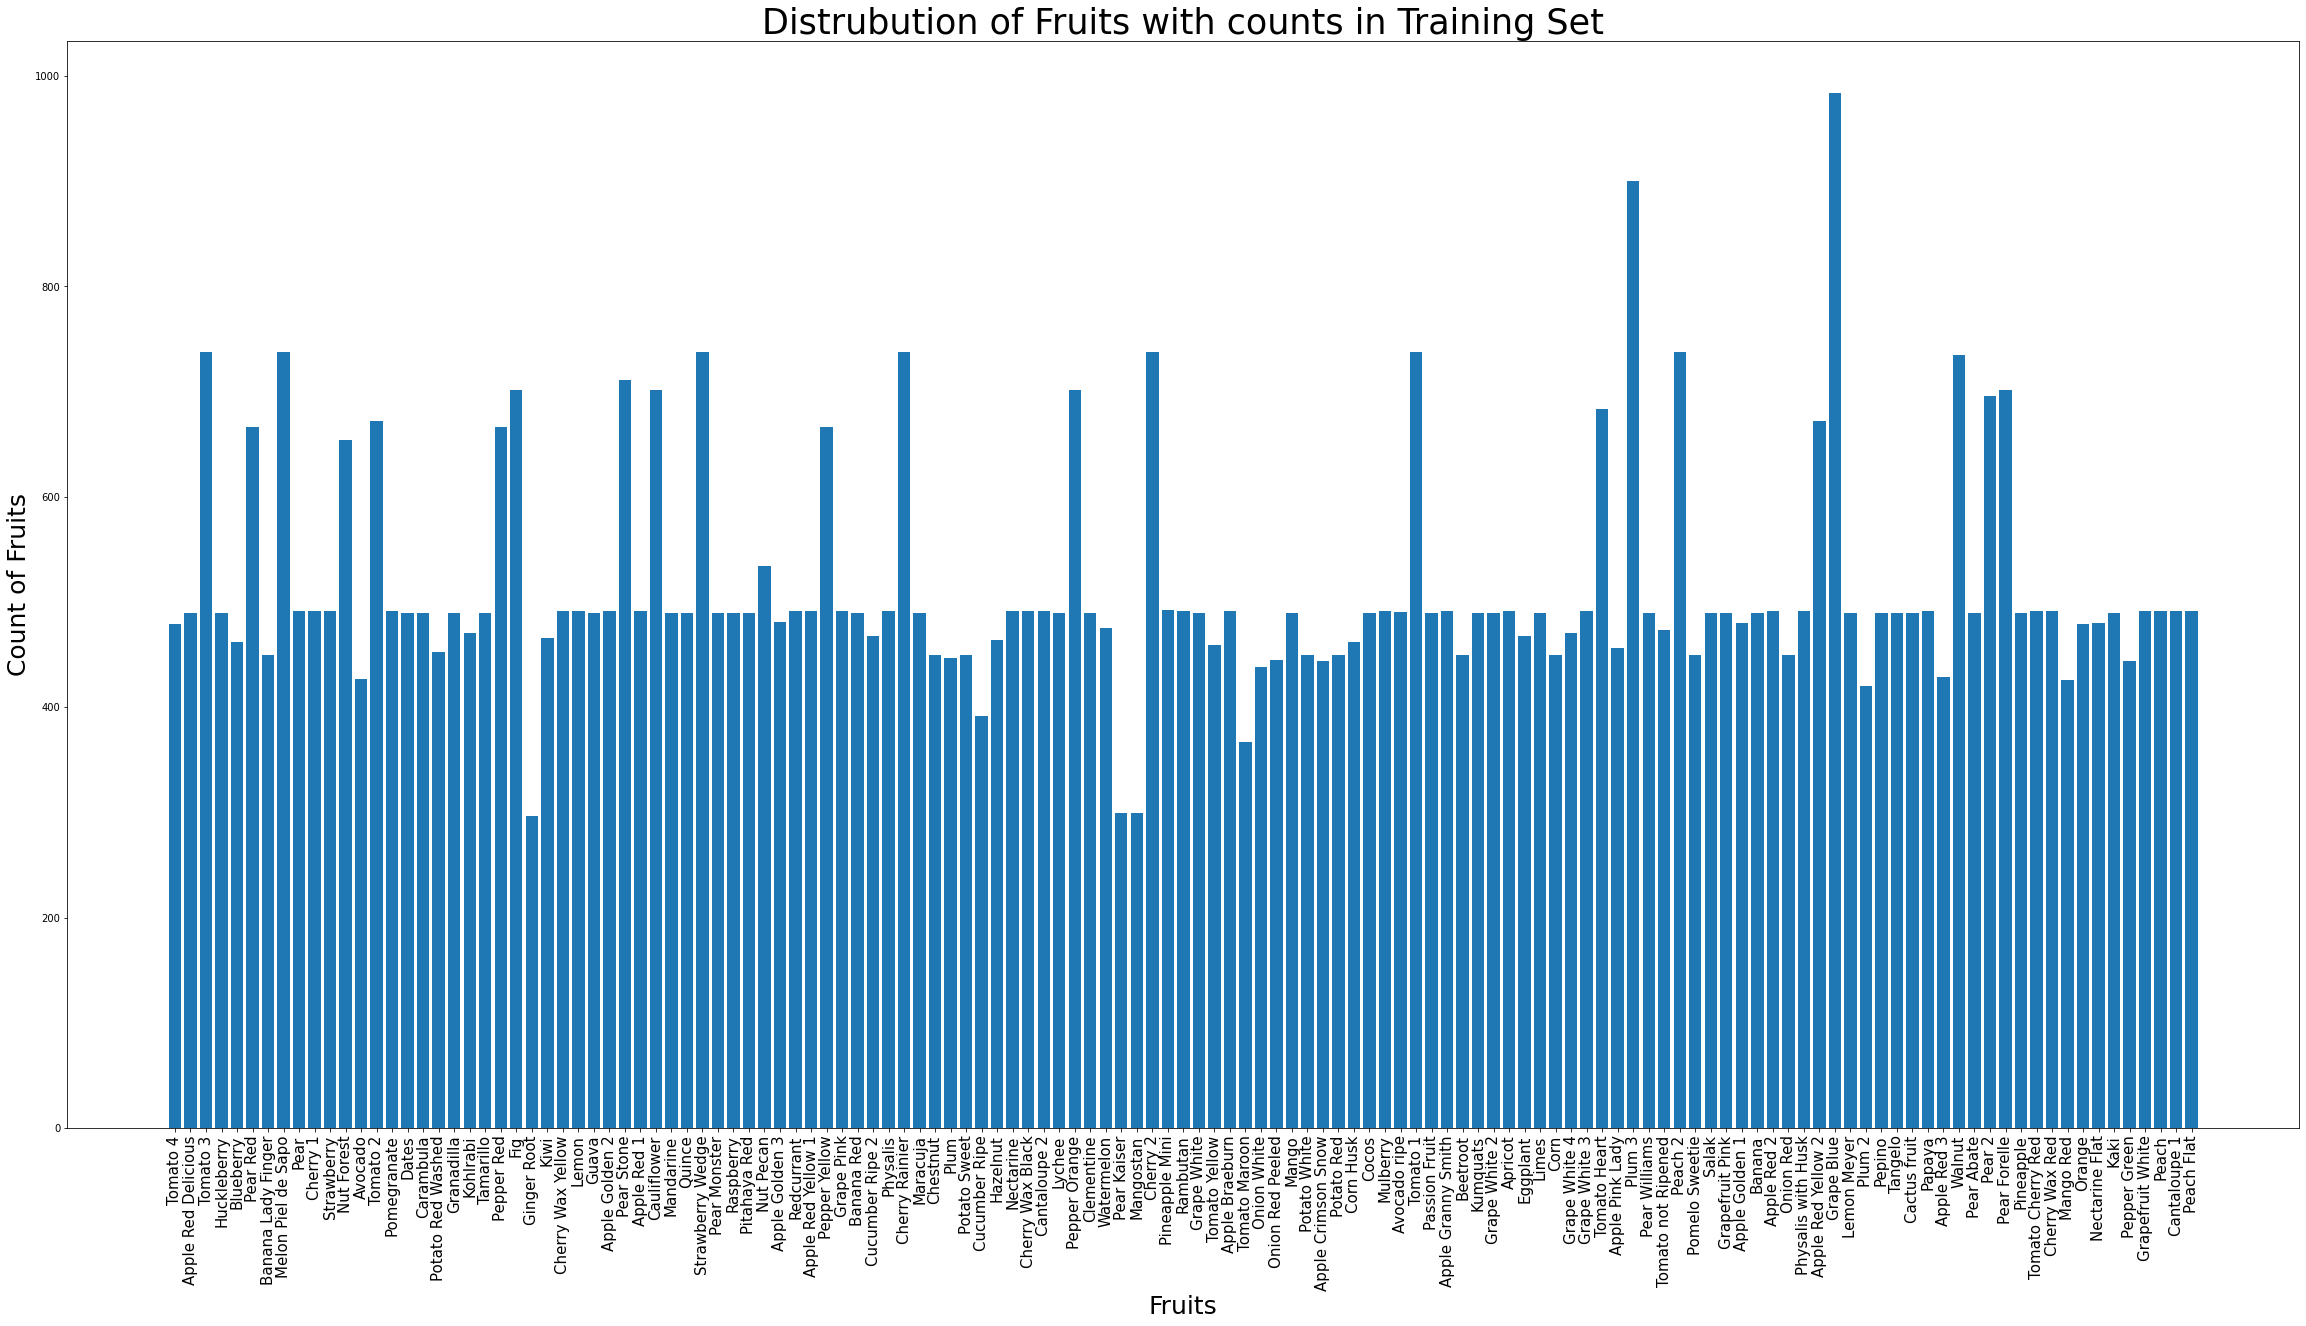

In [7]:
#Display how the distribution of samples are accross all classes
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show()

In [8]:
train_dir = '/Users/ayinlakwamdeen/Desktop/fruits-360/Training/'
test_dir = '/Users/ayinlakwamdeen/Desktop/fruits-360/Test/'

def load_dataset(data_path):
    data_loading = load_files(data_path)
    files_add = np.array(data_loading['filenames'])
    targets_fruits = np.array(data_loading['target'])
    target_labels_fruits = np.array(data_loading['target_names'])
    return files_add,targets_fruits,target_labels_fruits
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)

In [9]:
# Display of number of Total classes
no_of_classes = len(np.unique(y_train))
no_of_classes

131

In [10]:
#Display of array to confirm the class the first training sample belongs to.
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
#Creating a Validation set from the Test set
x_test,x_valid = x_test[11400:],x_test[:11400]
y_test,y_vaild = y_test[11400:],y_test[:11400]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (11400,)
Vaildation y : (11400, 131)
Test X :  (11288,)
Test y :  (11288, 131)


In [12]:
#matrix display of first training data, It is 255 neurons  
def convert_image_to_array_form(files):
    images_array=[]
    for file in files:
        images_array.append(img_to_array(load_img(file)))
    return images_array

x_train = np.array(convert_image_to_array_form(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array_form(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array_form(x_test))
# print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

print('1st training image as array',x_train[0]) 
# there are elements will other values too :p

Training set shape :  (67692, 100, 100, 3)
Validation set shape :  (11400, 100, 100, 3)
Test set shape :  (11288, 100, 100, 3)
1st training image shape  (100, 100, 3)
1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [13]:
#Divining the 255 size to make the max size "1"
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255


print('1st training image as array',x_train[0]) 

print("finished")

1st training image as array [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
finished


In [14]:
#Model Creation

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Dropout(0.30))
model.add(Flatten())
model.add(Dense(150,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(131,activation="softmax"))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy']) 

print("finished")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       7

2021-11-11 15:11:37.226494: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-11 15:11:37.227638: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [15]:
#Confirming if my GPU is activated. 
import tensorflow as tf 
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Please install GPU version of TF


In [16]:
# Training the model, where the main work is.
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=30,
        validation_data=(x_valid, y_vaild),
        verbose=2, shuffle=True)

Train on 67692 samples, validate on 11400 samples
Epoch 1/30
67692/67692 - 1154s - loss: 1.0360 - accuracy: 0.7178 - val_loss: 0.4402 - val_accuracy: 0.8821
Epoch 2/30
67692/67692 - 1344s - loss: 0.1382 - accuracy: 0.9562 - val_loss: 0.3271 - val_accuracy: 0.9188
Epoch 3/30
67692/67692 - 1145s - loss: 0.0904 - accuracy: 0.9739 - val_loss: 0.3902 - val_accuracy: 0.9323
Epoch 4/30
67692/67692 - 1376s - loss: 0.0856 - accuracy: 0.9784 - val_loss: 0.3720 - val_accuracy: 0.9552
Epoch 5/30
67692/67692 - 1147s - loss: 0.0812 - accuracy: 0.9810 - val_loss: 0.4347 - val_accuracy: 0.9469
Epoch 6/30
67692/67692 - 1152s - loss: 0.0924 - accuracy: 0.9809 - val_loss: 0.1731 - val_accuracy: 0.9702
Epoch 7/30
67692/67692 - 1158s - loss: 0.1001 - accuracy: 0.9813 - val_loss: 0.3825 - val_accuracy: 0.9632
Epoch 8/30
67692/67692 - 1156s - loss: 0.1070 - accuracy: 0.9821 - val_loss: 0.2665 - val_accuracy: 0.9758
Epoch 9/30
67692/67692 - 1151s - loss: 0.1043 - accuracy: 0.9816 - val_loss: 0.4215 - val_accu

In [57]:
#evaluate and print test accuracy
test_eval = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', test_eval[0]) # display average Test loss 
print('\n', 'Test accuracy:', test_eval[1]) # Display Test Accuracy
print('\n', 'Test accuracy:', format((test_eval[1] *100), '.2f') +"%") # Display Test Accuracy percentage


Test loss: 1.689247243379825

 Test accuracy: 0.97749823

 Test accuracy: 97.75%


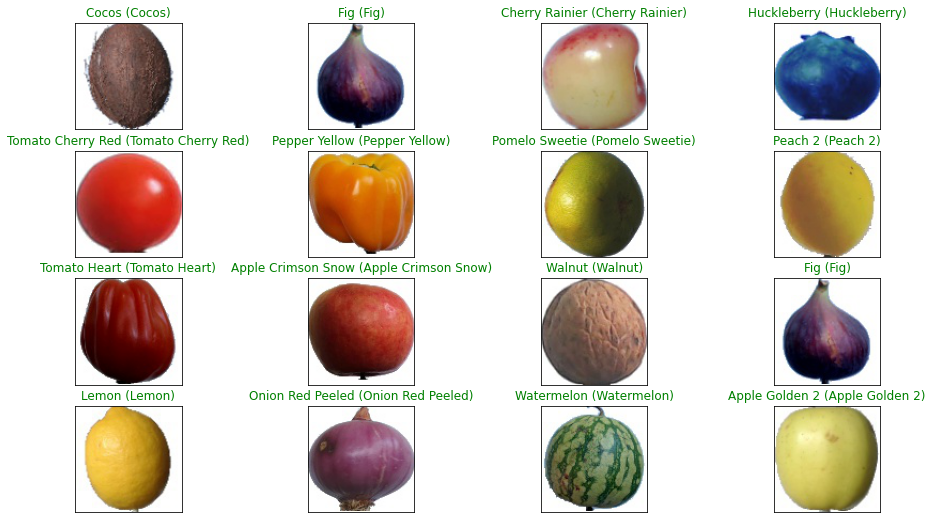

In [58]:
# Visualizing Predictions at random

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

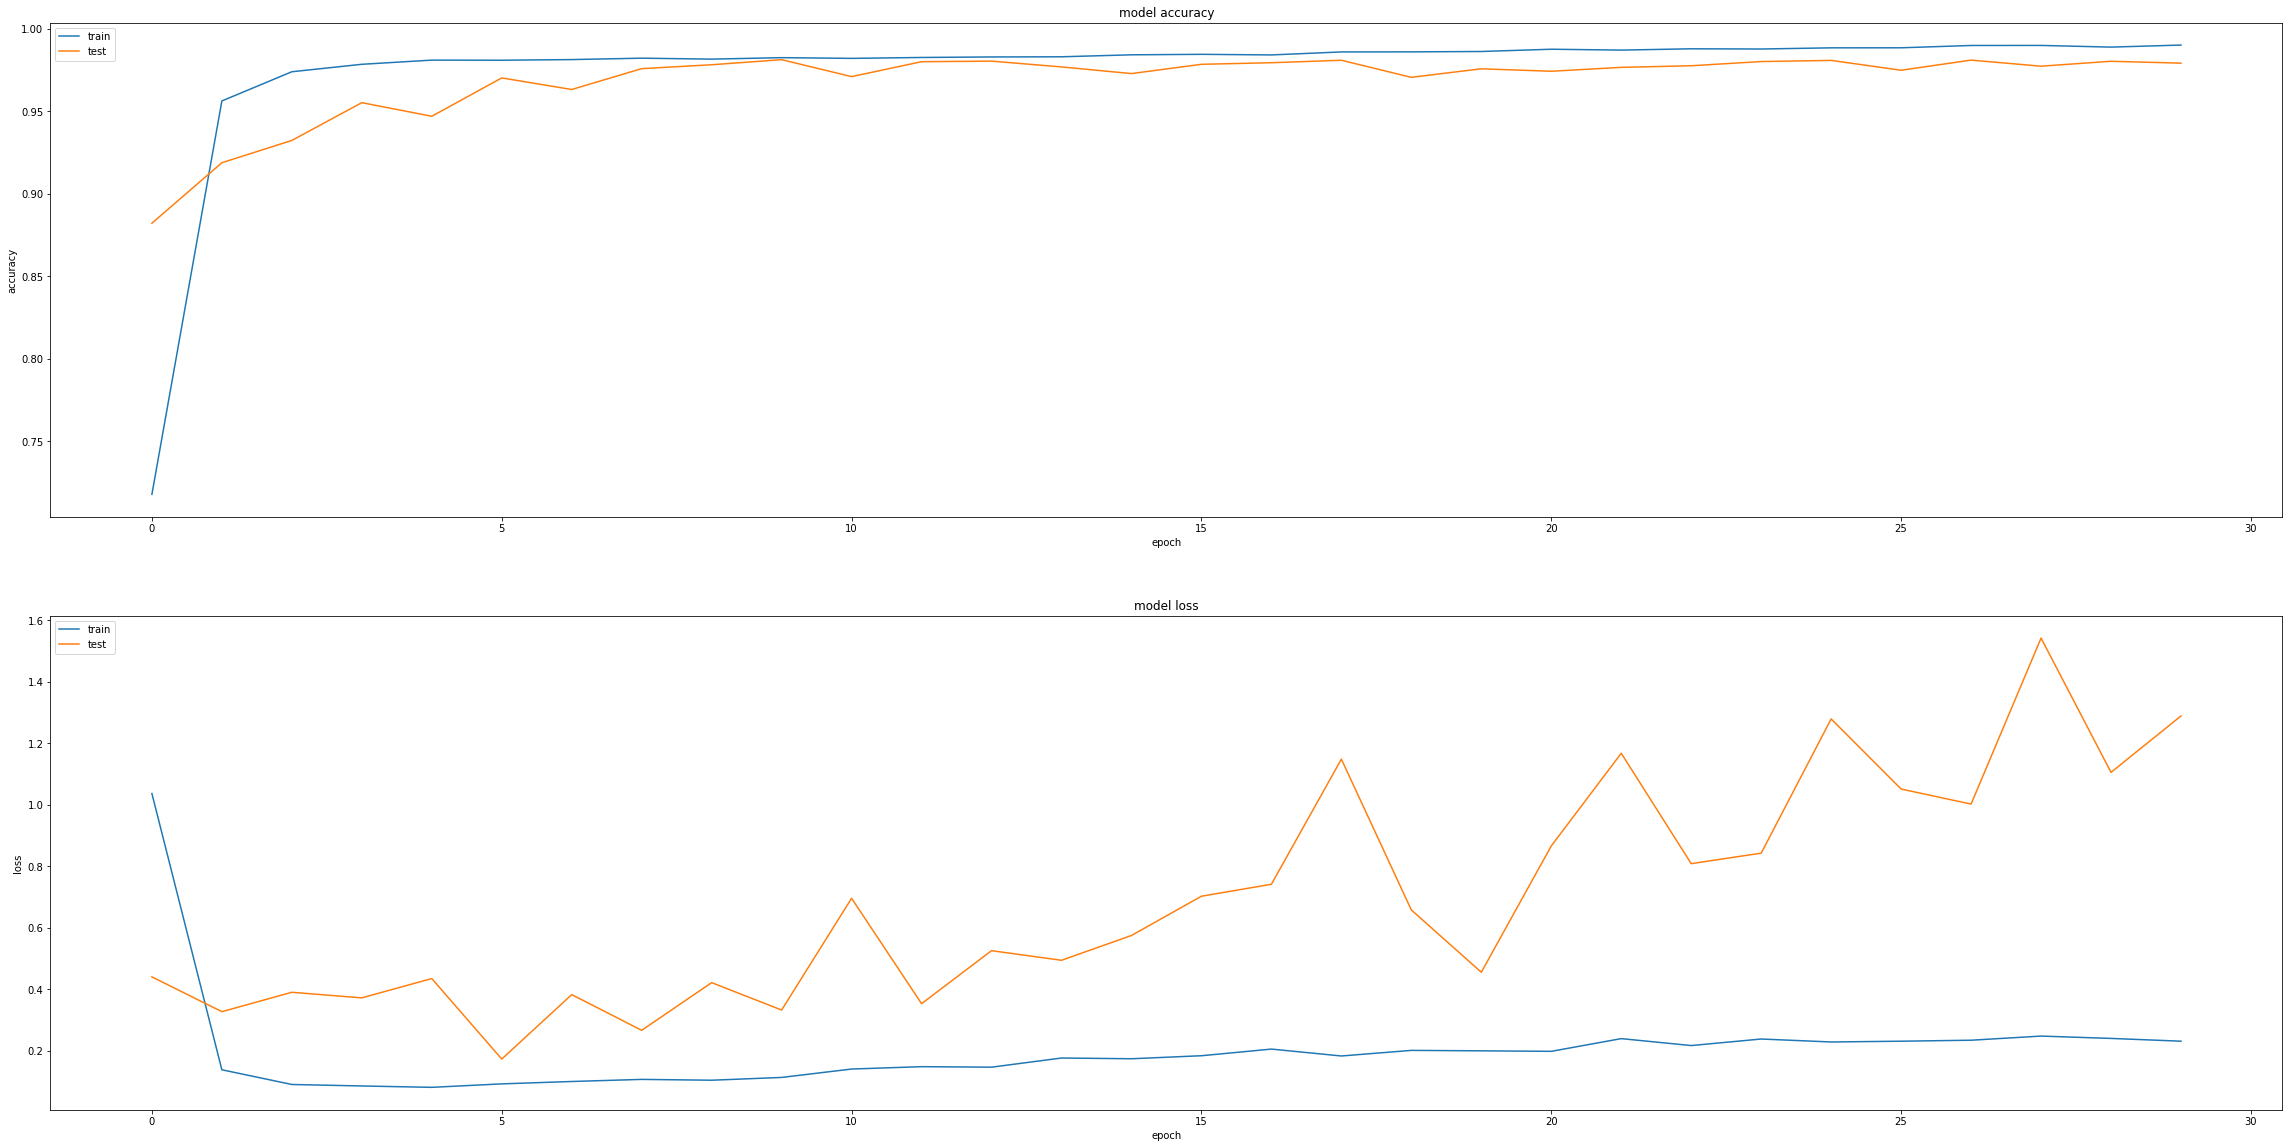

In [52]:
#Finally lets visualize the loss and accuracy wrt epochs
#summarize history for accuracy  
   
plt.figure(1)  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.subplot(212)  


#summary history for loss  
   
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()